In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Time_Management.csv')

In [4]:
# Preview first 5 rows of data set
df.head()

,User ID,Age,Daily Work Hours,Daily Leisure Hours,Daily Exercise Minutes,Daily Sleep Hours,Productivity Score,Screen Time (hours),Commute Time (hours)
0,1,62,5.5,4.0,92,5.2,55,3.7,0.6
1,2,32,4.8,3.5,6,8.8,69,7.2,1.9
2,3,52,3.4,2.1,75,7.2,68,3.3,2.0
3,4,50,9.4,4.0,53,6.9,91,7.5,1.6
4,5,63,8.7,5.6,46,7.4,72,2.8,2.3


In [5]:
# Preview last 5 rows of data set
df.tail()

,User ID,Age,Daily Work Hours,Daily Leisure Hours,Daily Exercise Minutes,Daily Sleep Hours,Productivity Score,Screen Time (hours),Commute Time (hours)
80,81,61,8.1,3.4,85,7.6,93,6.0,2.5
81,82,29,7.0,6.0,55,7.4,88,6.9,0.9
82,83,40,9.3,4.1,65,7.2,94,7.3,1.4
83,84,27,6.1,4.8,90,6.8,83,5.7,2.1
84,85,53,8.4,2.9,75,7.9,90,7.5,1.6


In [6]:
# Shape of data set
df.shape

(85, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 85 non-null     int64  
 1   Age                     85 non-null     int64  
 2   Daily Work Hours        85 non-null     float64
 3   Daily Leisure Hours     85 non-null     float64
 4   Daily Exercise Minutes  85 non-null     int64  
 5   Daily Sleep Hours       85 non-null     float64
 6   Productivity Score      85 non-null     int64  
 7   Screen Time (hours)     85 non-null     float64
 8   Commute Time (hours)    85 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.1 KB


In [8]:
# obtain the # of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

User ID                   0
Age                       0
Daily Work Hours          0
Daily Leisure Hours       0
Daily Exercise Minutes    0
Daily Sleep Hours         0
Productivity Score        0
Screen Time (hours)       0
Commute Time (hours)      0
dtype: int64

In [9]:
df['sleep_screen_ratio'] = (df['Daily Sleep Hours'] / df['Screen Time (hours)'])
df = df.replace([float('inf'), -float('inf')], float('nan'))
df

,User ID,Age,Daily Work Hours,Daily Leisure Hours,Daily Exercise Minutes,Daily Sleep Hours,Productivity Score,Screen Time (hours),Commute Time (hours),sleep_screen_ratio
0,1,62,5.5,4.0,92,5.2,55,3.7,0.6,1.405405
1,2,32,4.8,3.5,6,8.8,69,7.2,1.9,1.222222
2,3,52,3.4,2.1,75,7.2,68,3.3,2.0,2.181818
3,4,50,9.4,4.0,53,6.9,91,7.5,1.6,0.920000
4,5,63,8.7,5.6,46,7.4,72,2.8,2.3,2.642857
...,...,...,...,...,...,...,...,...,...,...
80,81,61,8.1,3.4,85,7.6,93,6.0,2.5,1.266667
81,82,29,7.0,6.0,55,7.4,88,6.9,0.9,1.072464
82,83,40,9.3,4.1,65,7.2,94,7.3,1.4,0.986301
83,84,27,6.1,4.8,90,6.8,83,5.7,2.1,1.192982


In [10]:
from matplotlib import pyplot as plt

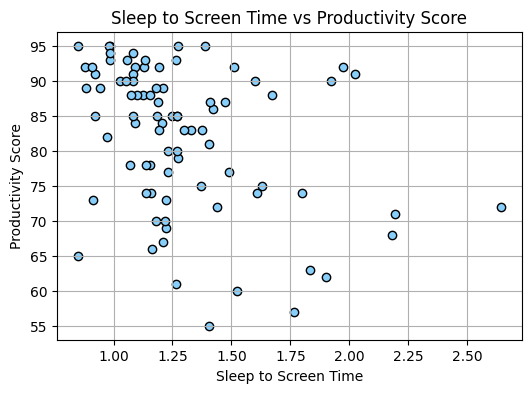

In [11]:
# plotting scatterplot and feature engineering
plt.style.use("default")
plt.figure(figsize=(6, 4))  # specify size of the chart
plt.scatter(df['sleep_screen_ratio'], df['Productivity Score'], color="lightskyblue", edgecolor="black")

# Adding annotations and visuals
plt.xlabel("Sleep to Screen Time")
plt.ylabel("Productivity Score")
plt.title("Sleep to Screen Time vs Productivity Score")
plt.grid(True)
plt.show()

In [12]:
df['work_leisure_ratio'] = df['Daily Work Hours'] / df['Daily Leisure Hours']

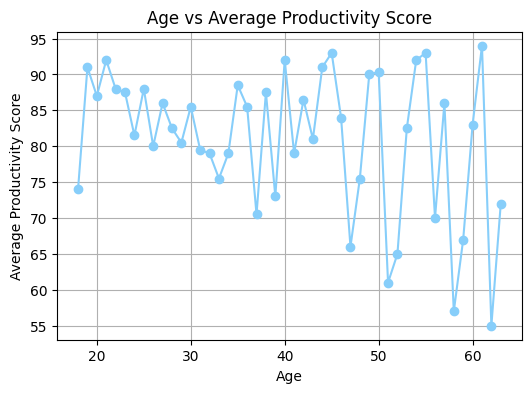

In [13]:
# Average productivity score per age 
age_avg_productivity = df.groupby('Age')['Productivity Score'].mean()

# Line plot
plt.figure(figsize=(6, 4))
plt.plot(age_avg_productivity.index, age_avg_productivity.values, marker='o', color='lightskyblue')

# Adding annotations and visuals
plt.xlabel("Age")
plt.ylabel("Average Productivity Score")
plt.title("Age vs Average Productivity Score")
plt.grid(True)
plt.show()

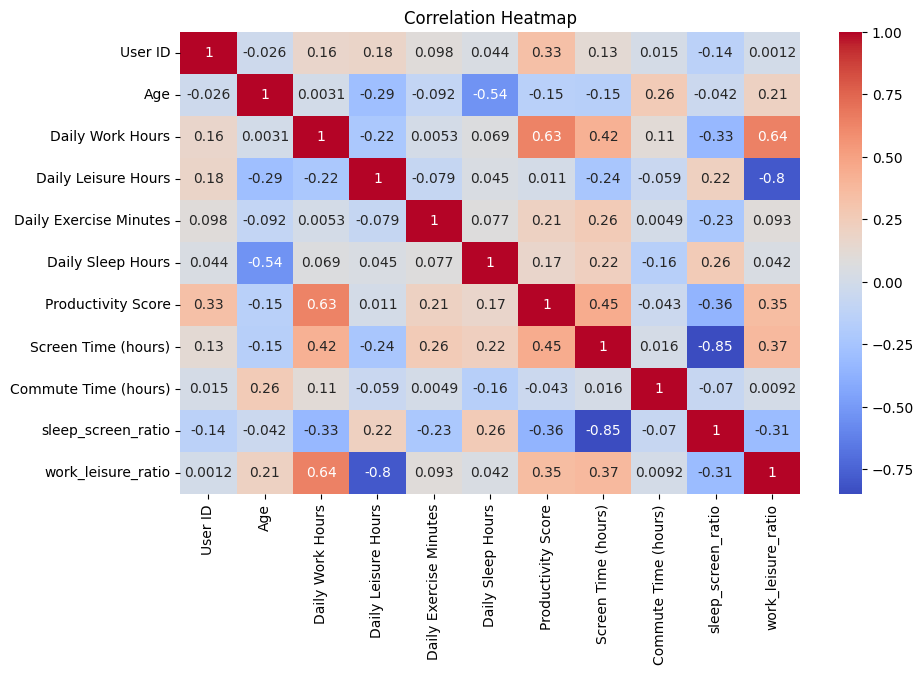

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Linear Regression MSE: 113.12
Polynomial Regression (Degree 2) MSE: 710.46
Random Forest Regression MSE: 63.33


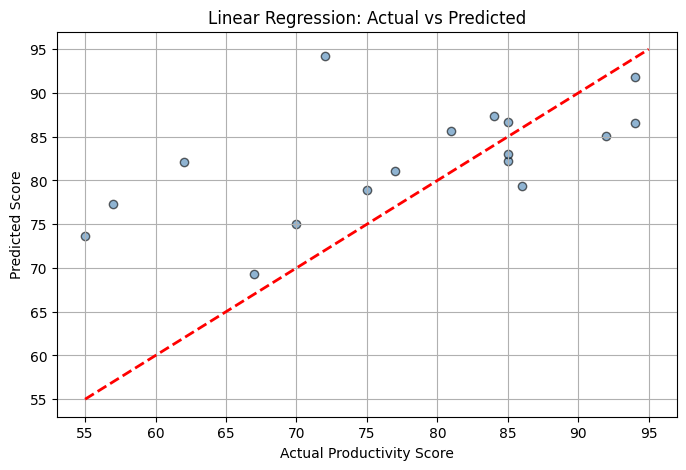

Cross-Validated MSE (Linear Regression): 59.27


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define feature column names as a list
feature_cols = ['Daily Work Hours', 'Daily Leisure Hours', 'Screen Time (hours)',
                'Daily Sleep Hours', 'sleep_screen_ratio', 'work_leisure_ratio']

X = df[feature_cols]
y = df['Productivity Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.2f}")

# polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression (Degree 2) MSE: {mse_poly:.2f}")

# random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf:.2f}")

# visual of linear regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='steelblue', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Productivity Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

# ======= CROSS VALIDATION =======
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validated MSE (Linear Regression): {-cv_scores.mean():.2f}")

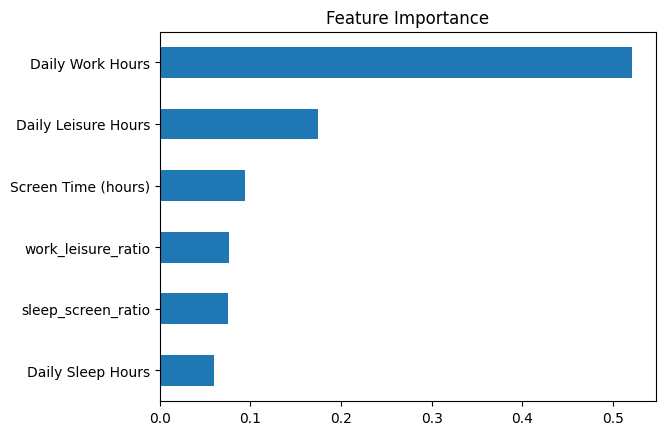

In [18]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()